## Importar Librerías

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import random

## Cargar dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Normalizar

In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

## Mostrar alguna imagen aleatoria

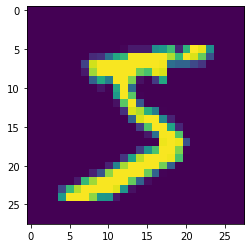

In [25]:
plt.imshow(X_train[0])
plt.show()

## Mostrar dimensiones del conjunto de datos

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

## Crear ruido

In [8]:
noise_factor = 0.4

X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

## Recortar valores entre 0 y 1

In [9]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

## Mostrar imágenes aleatorias de ruído

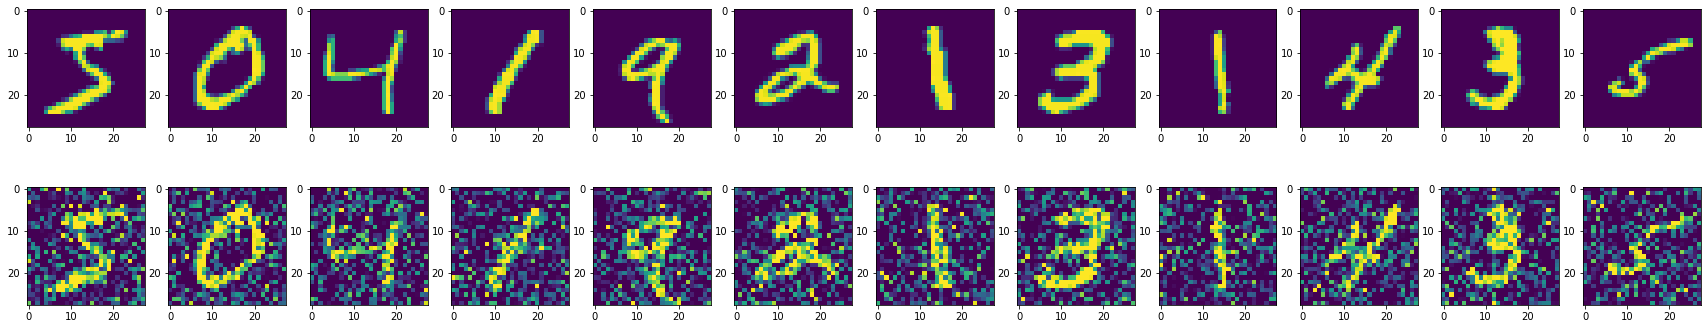

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=12, figsize=(30,6))
for images, row in zip([X_train[:15], X_train_noisy[:15]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)))

## Crear Auto Encoder

In [11]:
my_input = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same")(my_input)
x = tf.keras.layers.MaxPooling2D((2,2), padding="same")(x)
x = tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2,2), padding="same")(x)
Encoder = tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same")(x)

x = tf.keras.layers.UpSampling2D((2, 2))(Encoder)
x = tf.keras.layers.Conv2DTranspose(8,(3,3), strides=1, padding="same")(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
Decoder = tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding="same")(x)

In [12]:
AutoEncoder = tf.keras.models.Model(my_input, Decoder)
AutoEncoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0     

In [13]:
AutoEncoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2202
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1336
Epoch 3/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1241
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1196
Epoch 5/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1167
Epoch 6/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1145
Epoch 7/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1128
Epoch 8/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1115
Epoch 9/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1105
Epoch 10/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1095


In [14]:
denoised_images = AutoEncoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

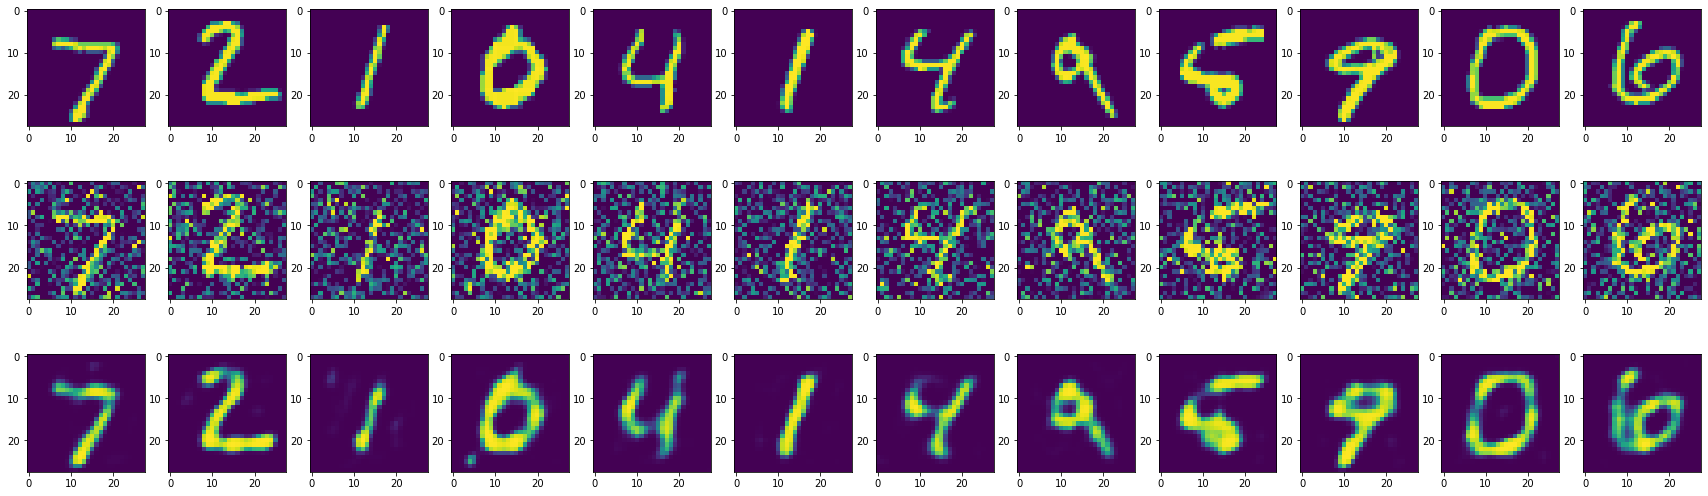

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=12, figsize=(30,9))
for images, row in zip([X_test[:15],X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)))